In [1]:
from __future__ import division

import collections
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.decomposition import PCA

## NN libs
import keras
from keras import backend as K
from keras import regularizers
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import TensorBoard

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# local libs
import config, models, setup, compression, ncd_evaluation
import midi
import midi.decode
from midi import generators as g
from utils import io, models_io, utils, plot, string
from capsule.layers import Capsule, Length
from capsule.capsulefunctions import squash, softmax, margin_loss

In [4]:
context = setup.init(max_bars=4)

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_timestesp = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]

Setting up params

max min f 20.0 0.25
 >> Context(max_t=4.0, dt=0.025, n_timesteps=160, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
 sample length:  160.000000
 max_f: 20.000000, min_f: 0.250000


In [5]:
n = 500 * 2
dim4 = True
multiTrack = True
reduce_dims = midi.ReduceDimsOptions.NONE # GLOBAL
dn = 'drum_midi/'
v = None # float | None
x_train, labels = setup.import_data(context, n, dim4=dim4, reduce_dims=reduce_dims, 
    dirname=dn, multiTrack=multiTrack, velocity=v, r=True)


Importing midi-data
walk_and_search(../datasets/drum_midi/)
path ../datasets/drum_midi/
path ../datasets/drum_midi/50´s Drummer MIDI Files
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM
  01 8th Hat.mid
  02 8th Ride.mid
  03 16th Snare.mid
  04 8th Ride.mid
  05 16th Ride.mid
  06 16th Ride.mid
  07 16th Ride.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM
  01 8th Hat.mid
  02 8th Snare.mid
  03 4th Snare .mid
  04 8th Ride.mid
  05 8th Snare.mid
  06 8th Toms.mid
  07 8th Toms.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/03 Lips n Hips 152BPM
  01 8th Perc.mid
  02 8th Ride.mid
  03 8th Ride .mid
  04 8th Snare.mid
  05 8th Snare.mid
  06 8th Hat.mid
  07 8th Snare.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/04 Maybelline 233BPM
  01 8th Snare.mid
  02 8th Cym.mid
  03 8th Ride.mid
  04 16t

  13 16th Toms.mid
  14 8th Cym.mid
  15 8th Ride.mid
path ../datasets/drum_midi/60´s Drummer MIDI Files/Early Kit/01 Rock n Roll/04 Deddley 150BPM
  01 8th Hat Open.mid
  02 8th Hat Open.mid
  03 8th Hat Closed.mid
  04 8th Hat Closed.mid
  05 8th Hat Closed.mid
  06 8th Hat Closed.mid
  07 8th Hat Closed.mid
  08 8th Hat Closed.mid
  09 8th Hat Closed.mid
  10 8th Cym.mid
  11 8th Cym.mid
  12 8th Snare.mid
  13 8th Snare.mid
  14 8th Snare.mid
  15 8th Toms.mid
path ../datasets/drum_midi/60´s Drummer MIDI Files/Early Kit/01 Rock n Roll/05 Diamond 164BPM
  01 8th Hat Closed Perc.mid
  02 8th Hat Closed Perc.mid
  03 8th Hat Closed Perc.mid
  04 8th Hat Open.mid
  05 8th Perc.mid
  06 8th Ride.mid
  07 8th Ride.mid
  08 8th Ride Toms.mid
  09 8th Toms.mid
  10 8th Toms.mid
  11 4th Hat Closed.mid
  12 4th Hat Closed.mid
  13 8th Hat Closed Perc.mid
  14 8th Cym Perc.mid
  15 8th Perc.mid
path ../datasets/drum_midi/60´s Drummer MIDI Files/Early Kit/01 Rock n Roll/06 Swingin 132BPM Trip


Encoding midi-data
 1000
> -> multi-track = True none
 [INFO] : 
 |  True


In [6]:
genres = [string.extract_labels_from_filename(k) for k in labels]
# genre_dict = setup.build_label_dict(genres)

In [7]:
[(i,k) for i,k in enumerate(labels)]

[(0,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/01 8th Hat.mid"),
 (1,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/02 8th Ride.mid"),
 (2,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/03 16th Snare.mid"),
 (3,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/04 8th Ride.mid"),
 (4,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/05 16th Ride.mid"),
 (5,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/06 16th Ride.mid"),
 (6,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/07 16th Ride.mid"),
 (7,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM/01 8th Hat.mid"),
 (8,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM/02 8th Snare.mid"),
 (9,
  "../datasets/

In [8]:
genres[0][-2:]

["01 Rock'n'Roll", '01 Dancin Rick 166BPM']

In [9]:
dn = config.dataset_dir + 'drum_midi/' + '50´s Drummer MIDI Files'
# for a in os.walk(config.dataset_dir + 'drum_midi'):
#     print(a)
sorted(os.listdir(dn))

['.DS_Store',
 "01 Rock'n'Roll",
 '02 Blues',
 '03 Traditional Pop',
 '04 Country',
 '05 Jazz',
 '06 Soul - Funk',
 '07 Indie']

In [10]:
unique_genres = set(genre[-2] +'/'+ genre[-1] for genre in genres)
len(unique_genres)

110

In [11]:
unique_genres

{'01 Rock n Roll/01 Shuffle 186BPM',
 '01 Rock n Roll/02 Straight 150BPM',
 '01 Rock n Roll/03 Chucky 140BPM',
 '01 Rock n Roll/04 Deddley 150BPM',
 '01 Rock n Roll/05 Diamond 164BPM',
 '01 Rock n Roll/06 Swingin 132BPM Triplets',
 '01 Rock n Roll/07 Domino 167BPM',
 '01 Rock n Roll/08 Offkick 182BPM',
 '01 Rock n Roll/09 Rumblin 192BPM Triplets',
 '01 Rock n Roll/10 Uptime 112BPM',
 "01 Rock'n'Roll/01 Dancin Rick 166BPM",
 "01 Rock'n'Roll/02 Gogo 191BPM",
 "01 Rock'n'Roll/03 Lips n Hips 152BPM",
 "01 Rock'n'Roll/04 Maybelline 233BPM",
 "01 Rock'n'Roll/05 Straight Line 136BPM",
 "01 Rock'n'Roll/06 Moonglow 140BPM",
 "01 Rock'n'Roll/07 Thwag 170BPM",
 "01 Rock'n'Roll/08 Doowoop 140bpm",
 "01 Rock'n'Roll/09 Diddeley 185bpm",
 "01 Rock'n'Roll/10 Ottis 172bpm",
 '02 Blues Rock/01 Clutch 90BPM Triplets',
 '02 Blues Rock/02 Sixeight 58BPM',
 '02 Blues Rock/03 Fire 148BPM',
 '02 Blues Rock/04 Whiteroom 112BPM',
 '02 Blues Rock/05 Bluesshuffle 116BPM',
 '02 Blues Rock/06 Straight 130BPM',
 '02

In [12]:
x_train.shape

(1000, 160, 10, 1)

In [13]:
m = int(x_train.shape[0] * 0.9)
x_train.shape, m

((1000, 160, 10, 1), 900)

In [14]:
x_test = x_train[m:]
x_train = x_train[:m]

In [15]:
# genres = [string.extract_labels_from_filename(k) for k in labels]
genre_dict = setup.build_label_dict(genres[:m])

In [16]:
# i = 0
# j = 399
# plot.single(x_train[i, :50,:,0])
# plot.single(x_train[j, :50,:,0])
# # plot.single(x_train[2a, :50,:,0])
# np.array(labels)[[i,j]]

In [17]:
input_shape = x_train[0].shape
timesteps = input_shape[0]
notes = input_shape[1]
input_shape

(160, 10, 1)

In [18]:
latent_dim = 10
epsilon_std = 1.0

In [19]:
vae, encoder, generator = models.build(input_shape, latent_dim)

/Users/mark/src/pattern-recognition/src/models.py:81: UserWarning: Output "reshape_2" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "reshape_2" during training.
  vae.compile(optimizer='adam')


In [20]:
batch_size = 128
epochs = 500
params = {'batch_size': batch_size, 'return_y': False}

In [21]:
# phase_mod = 0.01
# whitening = False

In [22]:
# m = 1000
# useDataGenerator = False
# # useDataGenerator = True
# callbacks = [TensorBoard(log_dir=config.tmp_log_dir)]

# x = x_train[:m]
# # x = x_train
# # i = [0,1, 7,8, 14,15, 399,400]
# # x = x_train[i]
# # x = np.concatenate([x for _ in range(10)])
# print('x:', x.shape)

# print('batch_size: %i' % batch_size)
# print('update-iterations:', round(epochs * x.shape[0] / batch_size))
# if useDataGenerator:
#     datagen = models.ImageDataGenerator(x_train, batch_size, phase_mod, whitening)
#     history = collections.defaultdict(list)
#     n_batches = datagen.__len__()
#     for e in range(epochs):
#         print('\n[Epoch %i/%i] >>>>>>>>>' % (e, epochs))
#         for batch_i, (x_batch, y_batch) in enumerate(datagen.flow(x, x, batch_size)):
#             print(' Batch %i/%i' % (batch_i,n_batches))
#             x_ = x_batch
#             # x_ = datagen.shuffle_3rd_dim(x_)
#             # x_ = datagen.shuffle_3rd_dim_soft(x_, rate=0.5, scale=0.1, verbose=0)
#             h = vae.fit(x_, validation_data=(x_test, None), verbose=0)
#             for k,v in h.history.items(): 
#                 print(' \\_%s' % k, [round(v_,) for v_ in v])
#                 history[k].append(v)
#             if batch_i >= n_batches:
#                 break
# else:
#     h = vae.fit(x, epochs=epochs, validation_data=(x_test, None), callbacks=callbacks)
#     history = h.history

In [23]:
fn = config.model_dir + 'hi_res-v3p-4_vae.h5'
# fn = config.model_dir + 'hi_res2c_vae.h5'
fn = config.model_dir + 'final_model-500-.h5'

In [24]:
# io.save_dict('../logs/','train_loss', history)

In [25]:
# # for suffix, model in [('vae',vae), ('encoder',encoder), ('gen',generator)]:
# #     model.save_weights(dn + prefix + suffix + '.h5', "w")
# vae.save_weights(fn, "w")

In [26]:
vae.load_weights(fn)

In [27]:
# plt.plot(history['loss'])
# plt.plot(history['val_loss'])
# plt.ylim(0,150)

m (50, 10, 1)


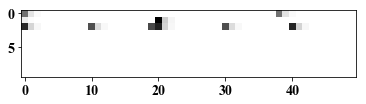

m (50, 10, 1)


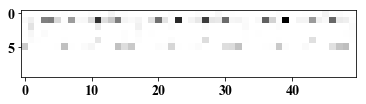

m (50, 10, 1)


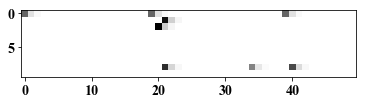

m (50, 10, 1)


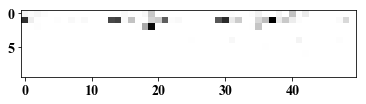

In [28]:
i,j = 0, 10
m = 50
y = vae.predict(x_train[:500])
plot.single(x_train[i,:m])
plot.single(y[i,:m])
plot.single(x_train[j,:m])
plot.single(y[j,:m])

In [29]:
# x = datagen.shuffle_3rd_dim_soft(x_train[:10], rate=1, intensity=2, scale=1, verbose=1)
# i = 0
# plot.single(x_train[i,:,:,0])
# plot.single(x[i,:,:,0])
# x_ = vae.predict(x)
# plot.single(x_[i,:,:,0])

In [30]:
# # min: these pixels are 'always' active
# m = x.min(axis=0)
# plot.multi(m[:30,:,0])

In [31]:
# # mean
# m = x.mean(axis=0)
# plot.single(m[:30,:,0])

## Encoder + Decoder (generator)
A model to project inputs on the latent space

In [32]:
# # build a model to project inputs on the latent space
# encoder = Model(encoder_input, z_mean)

In [33]:
# generator_input = Input((latent_dim,))
# generator_layers_ = utils.composition(decoders, generator_input)
# generator = Model(generator_input, generator_layers_)

In [34]:
decoder = generator

## Style transfer

In [35]:
import sklearn.feature_selection
import sklearn.ensemble

In [36]:
# pca = PCA(n_components=3)
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# It uses the LAPACK implementation of the full SVD or a randomized truncated SVD by the method of Halko et al. 2009,
# depending on the shape of the input data and the number of components to extract.

In [37]:
m = 1000
x_train_encoded = encoder.predict(x_train[:m], batch_size=batch_size)
x_train_encoded.shape

(900, 10)

In [38]:
# a = list({3:[2],'s':[3,3]}.keys())
# np.random.shuffle(a)
# a

In [39]:
import transformation_extraction

In [40]:
d = {'a':3, 'b':2}
dd = np.array(list(d.keys()))

In [41]:
best_dims, importances, transformations, min_transformations = \
    transformation_extraction.between_genres(x_train_encoded, genre_dict, amt1=50, amt2=1, v=1)


 Genre A: 02 Blues/09 Leroyes 130BPM
  genre B: 	03 Jazz/01 Swing 150BPM Triplets (len: 15)
 	 i: 9, importance: 0.259943

 Genre A: 02 Blues Rock/04 Whiteroom 112BPM
  genre B: 	03 Jazz/01 Swing 150BPM Triplets (len: 15)
 	 i: 9, importance: 0.310976

 Genre A: 03 Traditional Pop/05 Your Eyes 80BPM
  genre B: 	07 Indie/02 Rock Tribal 125BPM (len: 7)
 	 i: 9, importance: 0.218873

 Genre A: 05 Jazz/01 Amel 85BPM Brushes
  genre B: 	04 Country/04 Snarey 208BPM 3-4 (len: 7)
 	 i: 7, importance: 0.263969

 Genre A: 07 Indie/06 Swing Funk 102BPM
  genre B: 	01 Rock n Roll/03 Chucky 140BPM (len: 15)
 	 i: 7, importance: 0.191566

 Genre A: 06 Soul - Funk/01 Soul Groove 107BPM
  genre B: 	03 Traditional Pop/02 Frankies Girl 116BPM (len: 7)
 	 i: 2, importance: 0.264531

 Genre A: 03 Traditional Pop/02 Frankies Girl 116BPM
  genre B: 	04 Country/03 Straight 72BPM Brushes (len: 7)
 	 i: 7, importance: 0.302814

 Genre A: 03 Jazz/02 Boogaloo 170BPM Triplets
  genre B: 	03 Traditional Pop/09 Di

  genre B: 	07 Indie/14 Disco Smooth 97BPM (len: 7)
 	 i: 6, importance: 0.272943

 Genre A: 07 Indie/09 Slow Shuffle 80BPM
  genre B: 	03 Traditional Pop/10 Frewild 152BPM (len: 7)
 	 i: 4, importance: 0.190485

 Genre A: 01 Rock n Roll/06 Swingin 132BPM Triplets
  genre B: 	07 Indie/05 Halftime 71BPM (len: 7)
 	 i: 7, importance: 0.137511

 Genre A: 04 Country/07 Trainy 100BPM
  genre B: 	07 Indie/10 Chilled 120BPM (len: 7)
 	 i: 1, importance: 0.246792

 Genre A: 07 Indie/06 Swing Funk 102BPM
  genre B: 	06 Soul - Funk/08 Rim Soul 90BPM (len: 7)
 	 i: 9, importance: 0.196390

 Genre A: 02 Blues/06 Vidar Vega 70BPM
  genre B: 	02 Blues Rock/08 Shuffle 119BPM Triplets (len: 15)
 	 i: 2, importance: 0.215684

 Genre A: 03 Traditional Pop/09 Distel 155BPM
  genre B: 	07 Indie/09 Slow Shuffle 80BPM (len: 7)
 	 i: 1, importance: 0.206667

 Genre A: 02 Blues Rock/05 Bluesshuffle 116BPM
  genre B: 	05 Jazz/02 Another You 170BPM (len: 7)
 	 i: 2, importance: 0.339984

 Genre A: 01 Rock n Rol

  genre B: 	02 Blues/06 Vidar Vega 70BPM (len: 7)
 	 i: 2, importance: 0.268508

 Genre A: 01 Rock'n'Roll/09 Diddeley 185bpm
  genre B: 	01 Rock'n'Roll/06 Moonglow 140BPM (len: 7)
 	 i: 2, importance: 0.305043

 Genre A: 07 Indie/03 Moon 137BPM
  genre B: 	06 Soul - Funk/01 Soul Groove 107BPM (len: 7)
 	 i: 2, importance: 0.298210

 Genre A: 05 Jazz/04 Silent Tear 234BPM
  genre B: 	01 Rock n Roll/10 Uptime 112BPM (len: 15)
 	 i: 9, importance: 0.331427

 Genre A: 02 Blues/02 Nappy Brown 160BPM
  genre B: 	07 Indie/08 Bouncer 162BPM (len: 7)
 	 i: 6, importance: 0.375112

 Genre A: 03 Traditional Pop/02 Frankies Girl 116BPM
  genre B: 	06 Soul - Funk/02 Boogaloo 120BPM (len: 7)
 	 i: 3, importance: 0.213431

 Genre A: 02 Blues/10 Bogeart 122BPM
  genre B: 	03 Traditional Pop/10 Frewild 152BPM (len: 7)
 	 i: 0, importance: 0.278061

 Genre A: 01 Rock'n'Roll/05 Straight Line 136BPM
  genre B: 	07 Indie/11 Disco Dancer 135BPM (len: 7)
 	 i: 8, importance: 0.163307

 Genre A: 03 Traditiona

  genre B: 	04 Country/07 Trainy 100BPM (len: 7)
 	 i: 9, importance: 0.361947

 Genre A: 02 Blues Rock/08 Shuffle 119BPM Triplets
  genre B: 	05 Jazz/08 Neodop 226BPM 3-4 (len: 7)
 	 i: 9, importance: 0.258803

 Genre A: 03 Jazz/03 Gipsy 218BPM Triplets
  genre B: 	05 Jazz/05 TNT 116BPM (len: 7)
 	 i: 2, importance: 0.222305

 Genre A: 06 Soul - Funk/09 Smooth Soul 81BPM
  genre B: 	03 Traditional Pop/04 Love 155BPM (len: 7)
 	 i: 9, importance: 0.289082

 Genre A: 06 Soul - Funk/01 Soul Groove 107BPM
  genre B: 	03 Traditional Pop/05 Your Eyes 80BPM (len: 7)
 	 i: 2, importance: 0.261549

 Genre A: 02 Blues/09 Leroyes 130BPM
  genre B: 	05 Jazz/10 Scalis 190BPM 3-4 (len: 7)
 	 i: 4, importance: 0.323410

 Genre A: 04 Country/01 Calvin 148BPM
  genre B: 	07 Indie/12 Sticks Up 155BPM (len: 7)
 	 i: 7, importance: 0.239162

 Genre A: 02 Blues Rock/07 Ballad 77BPM
  genre B: 	02 Blues Rock/03 Fire 148BPM (len: 15)
 	 i: 7, importance: 0.198977

 Genre A: 02 Blues/02 Nappy Brown 160BPM
  

  genre B: 	03 Traditional Pop/03 King Quiza 102BPM (len: 7)
 	 i: 9, importance: 0.140455

 Genre A: 03 Traditional Pop/01 Fly High 115BPM
  genre B: 	02 Blues Rock/05 Bluesshuffle 116BPM (len: 15)
 	 i: 8, importance: 0.238164

 Genre A: 03 Traditional Pop/06 Bopop 130MPM
  genre B: 	03 Jazz/01 Swing 150BPM Triplets (len: 15)
 	 i: 5, importance: 0.276258

 Genre A: 04 Country/09 Broonze 122BPM
  genre B: 	02 Blues/08 Sams 127BPM (len: 7)
 	 i: 9, importance: 0.290787

 Genre A: 04 Country/06 Booker 170BPM
  genre B: 	02 Blues/07 Straight 88BPM (len: 7)
 	 i: 0, importance: 0.300658

 Genre A: 01 Rock'n'Roll/09 Diddeley 185bpm
  genre B: 	06 Soul - Funk/04 GoGo Soul 100BPM (len: 7)
 	 i: 9, importance: 0.289600

 Genre A: 01 Rock'n'Roll/10 Ottis 172bpm
  genre B: 	03 Traditional Pop/06 Bopop 130MPM (len: 7)
 	 i: 2, importance: 0.246292

 Genre A: 03 Traditional Pop/09 Distel 155BPM
  genre B: 	03 Traditional Pop/03 King Quiza 102BPM (len: 7)
 	 i: 4, importance: 0.233434

 Genre A: 

  genre B: 	02 Blues Rock/07 Ballad 77BPM (len: 15)
 	 i: 9, importance: 0.234511

 Genre A: 01 Rock n Roll/06 Swingin 132BPM Triplets
  genre B: 	05 Jazz/10 Scalis 190BPM 3-4 (len: 7)
 	 i: 8, importance: 0.234744

 Genre A: 02 Blues Rock/03 Fire 148BPM
  genre B: 	07 Indie/20 So Simple 102BPM (len: 7)
 	 i: 7, importance: 0.247791

 Genre A: 07 Indie/14 Disco Smooth 97BPM
  genre B: 	05 Jazz/03 Cool 137BPM Brushes (len: 7)
 	 i: 8, importance: 0.226624

 Genre A: 05 Jazz/07 Kooper 234BPM
  genre B: 	02 Blues Rock/04 Whiteroom 112BPM (len: 15)
 	 i: 9, importance: 0.362575

 Genre A: 01 Rock n Roll/05 Diamond 164BPM
  genre B: 	01 Rock'n'Roll/09 Diddeley 185bpm (len: 7)
 	 i: 0, importance: 0.243197

 Genre A: 07 Indie/03 Moon 137BPM
  genre B: 	03 Jazz/03 Gipsy 218BPM Triplets (len: 10)
 	 i: 5, importance: 0.174222

 Genre A: 06 Soul - Funk/06 JB Groove 115BPM
  genre B: 	07 Indie/12 Sticks Up 155BPM (len: 7)
 	 i: 7, importance: 0.157642

 Genre A: 05 Jazz/01 Amel 85BPM Brushes
  g

  genre B: 	06 Soul - Funk/08 Rim Soul 90BPM (len: 7)
 	 i: 7, importance: 0.280923

 Genre A: 01 Rock'n'Roll/06 Moonglow 140BPM
  genre B: 	03 Traditional Pop/08 Cecil Cee 101BPM (len: 7)
 	 i: 2, importance: 0.208803

 Genre A: 04 Country/06 Booker 170BPM
  genre B: 	03 Traditional Pop/02 Frankies Girl 116BPM (len: 7)
 	 i: 9, importance: 0.400638

 Genre A: 02 Blues/01 Booze 92BPM
  genre B: 	01 Rock'n'Roll/07 Thwag 170BPM (len: 7)
 	 i: 7, importance: 0.182330

 Genre A: 04 Country/02 Marching 94BPM
  genre B: 	02 Blues/03 Noton Bull 192BPM 12-8 Brushes (len: 7)
 	 i: 8, importance: 0.233311

 Genre A: 02 Blues Rock/03 Fire 148BPM
  genre B: 	02 Blues/10 Bogeart 122BPM (len: 7)
 	 i: 1, importance: 0.245301

 Genre A: 07 Indie/09 Slow Shuffle 80BPM
  genre B: 	06 Soul - Funk/09 Smooth Soul 81BPM (len: 7)
 	 i: 4, importance: 0.337681

 Genre A: 01 Rock'n'Roll/06 Moonglow 140BPM
  genre B: 	03 Traditional Pop/10 Frewild 152BPM (len: 7)
 	 i: 6, importance: 0.267091

 Genre A: 01 Roc

  genre B: 	03 Traditional Pop/06 Bopop 130MPM (len: 7)
 	 i: 6, importance: 0.386663

 Genre A: 07 Indie/20 So Simple 102BPM
  genre B: 	01 Rock n Roll/04 Deddley 150BPM (len: 15)
 	 i: 4, importance: 0.167565

 Genre A: 07 Indie/04 Titanic 97BPM
  genre B: 	04 Country/04 Snarey 208BPM 3-4 (len: 7)
 	 i: 7, importance: 0.190308

 Genre A: 06 Soul - Funk/02 Boogaloo 120BPM
  genre B: 	02 Blues Rock/08 Shuffle 119BPM Triplets (len: 15)
 	 i: 9, importance: 0.421246

 Genre A: 01 Rock'n'Roll/08 Doowoop 140bpm
  genre B: 	02 Blues Rock/04 Whiteroom 112BPM (len: 15)
 	 i: 7, importance: 0.230902

 Genre A: 04 Country/05 Brewer 160BPM
  genre B: 	02 Blues/04 Mickeys 212BPM 12-8 (len: 7)
 	 i: 6, importance: 0.197968

 Genre A: 04 Country/03 Straight 72BPM Brushes
  genre B: 	01 Rock'n'Roll/07 Thwag 170BPM (len: 7)
 	 i: 7, importance: 0.241460

 Genre A: 03 Jazz/02 Boogaloo 170BPM Triplets
  genre B: 	03 Traditional Pop/05 Your Eyes 80BPM (len: 7)
 	 i: 5, importance: 0.207574

 Genre A: 06

  genre B: 	06 Soul - Funk/01 Soul Groove 107BPM (len: 7)
 	 i: 2, importance: 0.307847

 Genre A: 05 Jazz/09 West Coast 152BPM Brushes
  genre B: 	02 Blues/05 Cadillac 128BPM (len: 7)
 	 i: 7, importance: 0.253035

 Genre A: 05 Jazz/10 Scalis 190BPM 3-4
  genre B: 	01 Rock'n'Roll/08 Doowoop 140bpm (len: 7)
 	 i: 7, importance: 0.222323

 Genre A: 07 Indie/20 So Simple 102BPM
  genre B: 	03 Traditional Pop/03 King Quiza 102BPM (len: 7)
 	 i: 6, importance: 0.312715

 Genre A: 02 Blues Rock/09 Bluesballad 97BPM
  genre B: 	01 Rock'n'Roll/05 Straight Line 136BPM (len: 7)
 	 i: 0, importance: 0.319873

 Genre A: 03 Traditional Pop/08 Cecil Cee 101BPM
  genre B: 	04 Country/06 Booker 170BPM (len: 7)
 	 i: 4, importance: 0.301343

 Genre A: 03 Traditional Pop/03 King Quiza 102BPM
  genre B: 	01 Rock n Roll/10 Uptime 112BPM (len: 15)
 	 i: 7, importance: 0.217872

 Genre A: 05 Jazz/10 Scalis 190BPM 3-4
  genre B: 	05 Jazz/06 Nucleus 172BPM Brushes (len: 7)
 	 i: 8, importance: 0.290560

 Gen

  genre B: 	05 Jazz/08 Neodop 226BPM 3-4 (len: 7)
 	 i: 4, importance: 0.320653

 Genre A: 07 Indie/14 Disco Smooth 97BPM
  genre B: 	06 Soul - Funk/07 Ride Swing 95Bpm (len: 7)
 	 i: 9, importance: 0.245238

 Genre A: 05 Jazz/10 Scalis 190BPM 3-4
  genre B: 	07 Indie/09 Slow Shuffle 80BPM (len: 7)
 	 i: 4, importance: 0.353796

 Genre A: 01 Rock'n'Roll/06 Moonglow 140BPM
  genre B: 	02 Blues Rock/04 Whiteroom 112BPM (len: 15)
 	 i: 3, importance: 0.219016

 Genre A: 05 Jazz/04 Silent Tear 234BPM
  genre B: 	01 Rock n Roll/02 Straight 150BPM (len: 15)
 	 i: 7, importance: 0.314899

 Genre A: 02 Blues/10 Bogeart 122BPM
  genre B: 	01 Rock'n'Roll/02 Gogo 191BPM (len: 7)
 	 i: 9, importance: 0.220543

 Genre A: 05 Jazz/07 Kooper 234BPM
  genre B: 	01 Rock'n'Roll/06 Moonglow 140BPM (len: 7)
 	 i: 6, importance: 0.333695

 Genre A: 07 Indie/20 So Simple 102BPM
  genre B: 	02 Blues Rock/10 Uptime 150BPM (len: 15)
 	 i: 6, importance: 0.219048

 Genre A: 05 Jazz/03 Cool 137BPM Brushes
  genre

  genre B: 	01 Rock'n'Roll/05 Straight Line 136BPM (len: 7)
 	 i: 5, importance: 0.170330

 Genre A: 02 Blues/09 Leroyes 130BPM
  genre B: 	07 Indie/05 Halftime 71BPM (len: 7)
 	 i: 4, importance: 0.186393

 Genre A: 02 Blues/03 Noton Bull 192BPM 12-8 Brushes
  genre B: 	03 Traditional Pop/01 Fly High 115BPM (len: 7)
 	 i: 0, importance: 0.285441

 Genre A: 07 Indie/16 Medium Flow 120BPM
  genre B: 	01 Rock n Roll/07 Domino 167BPM (len: 15)
 	 i: 9, importance: 0.206784

 Genre A: 05 Jazz/06 Nucleus 172BPM Brushes
  genre B: 	07 Indie/19 Distant Floor 119BPM (len: 7)
 	 i: 7, importance: 0.237092

 Genre A: 06 Soul - Funk/10 Syncopated Ride 128BPM
  genre B: 	03 Traditional Pop/08 Cecil Cee 101BPM (len: 7)
 	 i: 2, importance: 0.297104

 Genre A: 05 Jazz/05 TNT 116BPM
  genre B: 	01 Rock'n'Roll/05 Straight Line 136BPM (len: 7)
 	 i: 3, importance: 0.156298

 Genre A: 03 Traditional Pop/04 Love 155BPM
  genre B: 	03 Traditional Pop/10 Frewild 152BPM (len: 7)
 	 i: 9, importance: 0.28674

  genre B: 	07 Indie/09 Slow Shuffle 80BPM (len: 7)
 	 i: 4, importance: 0.277075

 Genre A: 03 Jazz/02 Boogaloo 170BPM Triplets
  genre B: 	02 Blues/09 Leroyes 130BPM (len: 7)
 	 i: 8, importance: 0.303455

 Genre A: 03 Traditional Pop/09 Distel 155BPM
  genre B: 	06 Soul - Funk/01 Soul Groove 107BPM (len: 7)
 	 i: 2, importance: 0.308100

 Genre A: 07 Indie/15 Tribal Shuffle 123BPM
  genre B: 	02 Blues Rock/02 Sixeight 58BPM (len: 15)
 	 i: 9, importance: 0.429776

 Genre A: 06 Soul - Funk/08 Rim Soul 90BPM
  genre B: 	01 Rock'n'Roll/06 Moonglow 140BPM (len: 7)
 	 i: 6, importance: 0.243590

 Genre A: 02 Blues Rock/10 Uptime 150BPM
  genre B: 	04 Country/10 Rough Rider 183BPM (len: 7)
 	 i: 9, importance: 0.196359

 Genre A: 03 Traditional Pop/06 Bopop 130MPM
  genre B: 	02 Blues/07 Straight 88BPM (len: 7)
 	 i: 0, importance: 0.255737

 Genre A: 01 Rock n Roll/09 Rumblin 192BPM Triplets
  genre B: 	01 Rock'n'Roll/05 Straight Line 136BPM (len: 7)
 	 i: 5, importance: 0.164715

 Genre

  genre B: 	05 Jazz/03 Cool 137BPM Brushes (len: 7)
 	 i: 4, importance: 0.210279

 Genre A: 03 Traditional Pop/03 King Quiza 102BPM
  genre B: 	06 Soul - Funk/09 Smooth Soul 81BPM (len: 7)
 	 i: 9, importance: 0.276981

 Genre A: 01 Rock n Roll/02 Straight 150BPM
  genre B: 	03 Traditional Pop/01 Fly High 115BPM (len: 7)
 	 i: 7, importance: 0.191460

 Genre A: 06 Soul - Funk/07 Ride Swing 95Bpm
  genre B: 	01 Rock n Roll/05 Diamond 164BPM (len: 15)
 	 i: 7, importance: 0.229486

 Genre A: 02 Blues Rock/05 Bluesshuffle 116BPM
  genre B: 	01 Rock'n'Roll/05 Straight Line 136BPM (len: 7)
 	 i: 0, importance: 0.191419

 Genre A: 07 Indie/01 Rock Shuffle 130BPM
  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 5, importance: 0.198121

 Genre A: 05 Jazz/10 Scalis 190BPM 3-4
  genre B: 	01 Rock n Roll/07 Domino 167BPM (len: 15)
 	 i: 4, importance: 0.316575

 Genre A: 01 Rock n Roll/03 Chucky 140BPM
  genre B: 	03 Traditional Pop/03 King Quiza 102BPM (len: 7)
 	 i: 9, importanc

  genre B: 	06 Soul - Funk/09 Smooth Soul 81BPM (len: 7)
 	 i: 7, importance: 0.276163

 Genre A: 01 Rock n Roll/08 Offkick 182BPM
  genre B: 	02 Blues Rock/02 Sixeight 58BPM (len: 15)
 	 i: 9, importance: 0.365460

 Genre A: 02 Blues/04 Mickeys 212BPM 12-8
  genre B: 	07 Indie/04 Titanic 97BPM (len: 7)
 	 i: 7, importance: 0.196139

 Genre A: 07 Indie/03 Moon 137BPM
  genre B: 	04 Country/08 Eddie Ed 111BPM (len: 7)
 	 i: 4, importance: 0.248443

 Genre A: 02 Blues/10 Bogeart 122BPM
  genre B: 	02 Blues Rock/03 Fire 148BPM (len: 15)
 	 i: 1, importance: 0.247286

 Genre A: 01 Rock'n'Roll/06 Moonglow 140BPM
  genre B: 	04 Country/03 Straight 72BPM Brushes (len: 7)
 	 i: 6, importance: 0.234228

 Genre A: 02 Blues Rock/08 Shuffle 119BPM Triplets
  genre B: 	03 Traditional Pop/03 King Quiza 102BPM (len: 7)
 	 i: 8, importance: 0.196084

 Genre A: 07 Indie/15 Tribal Shuffle 123BPM
  genre B: 	05 Jazz/07 Kooper 234BPM (len: 7)
 	 i: 7, importance: 0.174437

 Genre A: 02 Blues/07 Straight 8

  genre B: 	05 Jazz/07 Kooper 234BPM (len: 7)
 	 i: 9, importance: 0.289285

 Genre A: 04 Country/04 Snarey 208BPM 3-4
  genre B: 	02 Blues/07 Straight 88BPM (len: 7)
 	 i: 7, importance: 0.278894

 Genre A: 04 Country/02 Marching 94BPM
  genre B: 	03 Traditional Pop/07 Lester Lee 133BPM (len: 7)
 	 i: 0, importance: 0.329811

 Genre A: 03 Traditional Pop/06 Bopop 130MPM
  genre B: 	05 Jazz/03 Cool 137BPM Brushes (len: 7)
 	 i: 8, importance: 0.247769

 Genre A: 07 Indie/01 Rock Shuffle 130BPM
  genre B: 	05 Jazz/02 Another You 170BPM (len: 7)
 	 i: 2, importance: 0.316533

 Genre A: 02 Blues/01 Booze 92BPM
  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 8, importance: 0.250921

 Genre A: 05 Jazz/08 Neodop 226BPM 3-4
  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 8, importance: 0.186130

 Genre A: 03 Jazz/02 Boogaloo 170BPM Triplets
  genre B: 	06 Soul - Funk/01 Soul Groove 107BPM (len: 7)
 	 i: 7, importance: 0.239494

 Genre A: 06 Soul - Funk/01 Soul 

  genre B: 	02 Blues Rock/10 Uptime 150BPM (len: 15)
 	 i: 8, importance: 0.229669

 Genre A: 05 Jazz/10 Scalis 190BPM 3-4
  genre B: 	05 Jazz/06 Nucleus 172BPM Brushes (len: 7)
 	 i: 8, importance: 0.290560

 Genre A: 04 Country/06 Booker 170BPM
  genre B: 	02 Blues Rock/04 Whiteroom 112BPM (len: 15)
 	 i: 0, importance: 0.280396

 Genre A: 02 Blues Rock/09 Bluesballad 97BPM
  genre B: 	03 Traditional Pop/07 Lester Lee 133BPM (len: 7)
 	 i: 0, importance: 0.237824

 Genre A: 07 Indie/01 Rock Shuffle 130BPM
  genre B: 	05 Jazz/10 Scalis 190BPM 3-4 (len: 7)
 	 i: 8, importance: 0.240709

 Genre A: 04 Country/05 Brewer 160BPM
  genre B: 	03 Traditional Pop/04 Love 155BPM (len: 7)
 	 i: 1, importance: 0.161263

 Genre A: 04 Country/08 Eddie Ed 111BPM
  genre B: 	01 Rock n Roll/06 Swingin 132BPM Triplets (len: 15)
 	 i: 7, importance: 0.314335

 Genre A: 07 Indie/06 Swing Funk 102BPM
  genre B: 	01 Rock n Roll/09 Rumblin 192BPM Triplets (len: 15)
 	 i: 7, importance: 0.248845

 Genre A: 05

  genre B: 	01 Rock'n'Roll/09 Diddeley 185bpm (len: 7)
 	 i: 9, importance: 0.271454

 Genre A: 03 Traditional Pop/09 Distel 155BPM
  genre B: 	01 Rock n Roll/02 Straight 150BPM (len: 15)
 	 i: 7, importance: 0.143907

 Genre A: 02 Blues/07 Straight 88BPM
  genre B: 	07 Indie/05 Halftime 71BPM (len: 7)
 	 i: 9, importance: 0.153544

 Genre A: 07 Indie/17 Relaxed 88BPM
  genre B: 	01 Rock n Roll/08 Offkick 182BPM (len: 15)
 	 i: 6, importance: 0.174139

 Genre A: 01 Rock'n'Roll/09 Diddeley 185bpm
  genre B: 	03 Traditional Pop/09 Distel 155BPM (len: 7)
 	 i: 4, importance: 0.281606

 Genre A: 02 Blues/01 Booze 92BPM
  genre B: 	07 Indie/14 Disco Smooth 97BPM (len: 7)
 	 i: 4, importance: 0.182454

 Genre A: 05 Jazz/03 Cool 137BPM Brushes
  genre B: 	05 Jazz/02 Another You 170BPM (len: 7)
 	 i: 9, importance: 0.331450

 Genre A: 03 Jazz/02 Boogaloo 170BPM Triplets
  genre B: 	02 Blues/10 Bogeart 122BPM (len: 7)
 	 i: 1, importance: 0.208275

 Genre A: 02 Blues/06 Vidar Vega 70BPM
  genre

  genre B: 	01 Rock'n'Roll/05 Straight Line 136BPM (len: 7)
 	 i: 5, importance: 0.241554

 Genre A: 03 Traditional Pop/03 King Quiza 102BPM
  genre B: 	04 Country/07 Trainy 100BPM (len: 7)
 	 i: 7, importance: 0.209605

 Genre A: 07 Indie/09 Slow Shuffle 80BPM
  genre B: 	07 Indie/10 Chilled 120BPM (len: 7)
 	 i: 8, importance: 0.220014

 Genre A: 02 Blues Rock/08 Shuffle 119BPM Triplets
  genre B: 	01 Rock n Roll/06 Swingin 132BPM Triplets (len: 15)
 	 i: 8, importance: 0.223565

 Genre A: 01 Rock n Roll/01 Shuffle 186BPM
  genre B: 	03 Traditional Pop/03 King Quiza 102BPM (len: 7)
 	 i: 9, importance: 0.140455

 Genre A: 01 Rock n Roll/03 Chucky 140BPM
  genre B: 	07 Indie/04 Titanic 97BPM (len: 7)
 	 i: 4, importance: 0.269221

 Genre A: 03 Traditional Pop/03 King Quiza 102BPM
  genre B: 	03 Traditional Pop/05 Your Eyes 80BPM (len: 7)
 	 i: 3, importance: 0.186080

 Genre A: 03 Traditional Pop/10 Frewild 152BPM
  genre B: 	01 Rock'n'Roll/01 Dancin Rick 166BPM (len: 7)
 	 i: 4, impo

  genre B: 	02 Blues/02 Nappy Brown 160BPM (len: 7)
 	 i: 6, importance: 0.374228

 Genre A: 02 Blues Rock/02 Sixeight 58BPM
  genre B: 	07 Indie/15 Tribal Shuffle 123BPM (len: 7)
 	 i: 9, importance: 0.434160

 Genre A: 07 Indie/10 Chilled 120BPM
  genre B: 	04 Country/02 Marching 94BPM (len: 7)
 	 i: 8, importance: 0.258725

 Genre A: 02 Blues/08 Sams 127BPM
  genre B: 	06 Soul - Funk/09 Smooth Soul 81BPM (len: 7)
 	 i: 3, importance: 0.264125

 Genre A: 02 Blues Rock/01 Clutch 90BPM Triplets
  genre B: 	03 Traditional Pop/09 Distel 155BPM (len: 7)
 	 i: 4, importance: 0.357269

 Genre A: 04 Country/07 Trainy 100BPM
  genre B: 	06 Soul - Funk/07 Ride Swing 95Bpm (len: 7)
 	 i: 8, importance: 0.248270

 Genre A: 02 Blues/05 Cadillac 128BPM
  genre B: 	01 Rock n Roll/04 Deddley 150BPM (len: 15)
 	 i: 1, importance: 0.194296

 Genre A: 07 Indie/15 Tribal Shuffle 123BPM
  genre B: 	04 Country/06 Booker 170BPM (len: 7)
 	 i: 0, importance: 0.178830

 Genre A: 04 Country/04 Snarey 208BPM 3

  genre B: 	07 Indie/09 Slow Shuffle 80BPM (len: 7)
 	 i: 4, importance: 0.277075

 Genre A: 04 Country/03 Straight 72BPM Brushes
  genre B: 	07 Indie/07 Rock Keeler 133BPM (len: 7)
 	 i: 7, importance: 0.290891

 Genre A: 07 Indie/02 Rock Tribal 125BPM
  genre B: 	01 Rock n Roll/03 Chucky 140BPM (len: 15)
 	 i: 4, importance: 0.265588

 Genre A: 04 Country/08 Eddie Ed 111BPM
  genre B: 	01 Rock'n'Roll/07 Thwag 170BPM (len: 7)
 	 i: 4, importance: 0.262738

 Genre A: 01 Rock n Roll/02 Straight 150BPM
  genre B: 	02 Blues Rock/10 Uptime 150BPM (len: 15)
 	 i: 2, importance: 0.216241

 Genre A: 07 Indie/17 Relaxed 88BPM
  genre B: 	03 Traditional Pop/04 Love 155BPM (len: 7)
 	 i: 6, importance: 0.164203

 Genre A: 07 Indie/13 Mid Groover 111BPM
  genre B: 	03 Traditional Pop/01 Fly High 115BPM (len: 7)
 	 i: 6, importance: 0.192218

 Genre A: 02 Blues/09 Leroyes 130BPM
  genre B: 	05 Jazz/09 West Coast 152BPM Brushes (len: 7)
 	 i: 2, importance: 0.267756

 Genre A: 06 Soul - Funk/02 Boo

  genre B: 	02 Blues Rock/10 Uptime 150BPM (len: 15)
 	 i: 6, importance: 0.190878

 Genre A: 07 Indie/07 Rock Keeler 133BPM
  genre B: 	07 Indie/15 Tribal Shuffle 123BPM (len: 7)
 	 i: 9, importance: 0.268392

 Genre A: 01 Rock n Roll/01 Shuffle 186BPM
  genre B: 	03 Traditional Pop/04 Love 155BPM (len: 7)
 	 i: 0, importance: 0.205003

 Genre A: 01 Rock n Roll/01 Shuffle 186BPM
  genre B: 	07 Indie/08 Bouncer 162BPM (len: 7)
 	 i: 0, importance: 0.299813

 Genre A: 02 Blues/03 Noton Bull 192BPM 12-8 Brushes
  genre B: 	06 Soul - Funk/06 JB Groove 115BPM (len: 7)
 	 i: 0, importance: 0.239397

 Genre A: 07 Indie/10 Chilled 120BPM
  genre B: 	07 Indie/19 Distant Floor 119BPM (len: 7)
 	 i: 6, importance: 0.188393

 Genre A: 01 Rock n Roll/05 Diamond 164BPM
  genre B: 	02 Blues/09 Leroyes 130BPM (len: 7)
 	 i: 7, importance: 0.240769

 Genre A: 01 Rock n Roll/02 Straight 150BPM
  genre B: 	07 Indie/11 Disco Dancer 135BPM (len: 7)
 	 i: 7, importance: 0.163157

 Genre A: 05 Jazz/08 Neodo

  genre B: 	04 Country/09 Broonze 122BPM (len: 7)
 	 i: 0, importance: 0.178534

 Genre A: 07 Indie/20 So Simple 102BPM
  genre B: 	05 Jazz/09 West Coast 152BPM Brushes (len: 7)
 	 i: 6, importance: 0.269291

 Genre A: 07 Indie/20 So Simple 102BPM
  genre B: 	02 Blues Rock/08 Shuffle 119BPM Triplets (len: 15)
 	 i: 6, importance: 0.365303

 Genre A: 05 Jazz/08 Neodop 226BPM 3-4
  genre B: 	05 Jazz/09 West Coast 152BPM Brushes (len: 7)
 	 i: 2, importance: 0.274574

 Genre A: 04 Country/03 Straight 72BPM Brushes
  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 2, importance: 0.278808

 Genre A: 07 Indie/02 Rock Tribal 125BPM
  genre B: 	03 Jazz/01 Swing 150BPM Triplets (len: 15)
 	 i: 5, importance: 0.232891

 Genre A: 04 Country/09 Broonze 122BPM
  genre B: 	01 Rock n Roll/09 Rumblin 192BPM Triplets (len: 15)
 	 i: 2, importance: 0.228283

 Genre A: 06 Soul - Funk/08 Rim Soul 90BPM
  genre B: 	07 Indie/11 Disco Dancer 135BPM (len: 7)
 	 i: 9, importance: 0.346564

 Genre

  genre B: 	05 Jazz/10 Scalis 190BPM 3-4 (len: 7)
 	 i: 8, importance: 0.278019

 Genre A: 02 Blues/06 Vidar Vega 70BPM
  genre B: 	07 Indie/02 Rock Tribal 125BPM (len: 7)
 	 i: 4, importance: 0.184998

 Genre A: 07 Indie/05 Halftime 71BPM
  genre B: 	06 Soul - Funk/09 Smooth Soul 81BPM (len: 7)
 	 i: 3, importance: 0.159073

 Genre A: 04 Country/01 Calvin 148BPM
  genre B: 	01 Rock'n'Roll/02 Gogo 191BPM (len: 7)
 	 i: 7, importance: 0.273713

 Genre A: 02 Blues/06 Vidar Vega 70BPM
  genre B: 	02 Blues/10 Bogeart 122BPM (len: 7)
 	 i: 1, importance: 0.190931

 Genre A: 07 Indie/16 Medium Flow 120BPM
  genre B: 	07 Indie/20 So Simple 102BPM (len: 7)
 	 i: 4, importance: 0.224417

 Genre A: 02 Blues/04 Mickeys 212BPM 12-8
  genre B: 	01 Rock n Roll/07 Domino 167BPM (len: 15)
 	 i: 3, importance: 0.170112

 Genre A: 06 Soul - Funk/05 Hip Hop 95BPM
  genre B: 	01 Rock n Roll/02 Straight 150BPM (len: 15)
 	 i: 9, importance: 0.339113

 Genre A: 07 Indie/14 Disco Smooth 97BPM
  genre B: 	07 

  genre B: 	01 Rock'n'Roll/05 Straight Line 136BPM (len: 7)
 	 i: 7, importance: 0.222495

 Genre A: 02 Blues Rock/02 Sixeight 58BPM
  genre B: 	07 Indie/19 Distant Floor 119BPM (len: 7)
 	 i: 7, importance: 0.328237

 Genre A: 02 Blues/08 Sams 127BPM
  genre B: 	05 Jazz/09 West Coast 152BPM Brushes (len: 7)
 	 i: 8, importance: 0.267124

 Genre A: 04 Country/08 Eddie Ed 111BPM
  genre B: 	01 Rock n Roll/10 Uptime 112BPM (len: 15)
 	 i: 2, importance: 0.242117

 Genre A: 07 Indie/04 Titanic 97BPM
  genre B: 	01 Rock n Roll/02 Straight 150BPM (len: 15)
 	 i: 9, importance: 0.190606

 Genre A: 01 Rock'n'Roll/06 Moonglow 140BPM
  genre B: 	05 Jazz/02 Another You 170BPM (len: 7)
 	 i: 2, importance: 0.269824

 Genre A: 07 Indie/08 Bouncer 162BPM
  genre B: 	05 Jazz/01 Amel 85BPM Brushes (len: 7)
 	 i: 8, importance: 0.263078

 Genre A: 01 Rock n Roll/01 Shuffle 186BPM
  genre B: 	05 Jazz/05 TNT 116BPM (len: 7)
 	 i: 7, importance: 0.206587

 Genre A: 06 Soul - Funk/09 Smooth Soul 81BPM
  g

  genre B: 	05 Jazz/04 Silent Tear 234BPM (len: 7)
 	 i: 9, importance: 0.230085

 Genre A: 02 Blues/09 Leroyes 130BPM
  genre B: 	01 Rock'n'Roll/10 Ottis 172bpm (len: 7)
 	 i: 2, importance: 0.197500

 Genre A: 03 Jazz/03 Gipsy 218BPM Triplets
  genre B: 	06 Soul - Funk/05 Hip Hop 95BPM (len: 7)
 	 i: 7, importance: 0.287038

 Genre A: 01 Rock n Roll/04 Deddley 150BPM
  genre B: 	01 Rock'n'Roll/05 Straight Line 136BPM (len: 7)
 	 i: 5, importance: 0.155892

 Genre A: 07 Indie/19 Distant Floor 119BPM
  genre B: 	06 Soul - Funk/05 Hip Hop 95BPM (len: 7)
 	 i: 7, importance: 0.171649

 Genre A: 07 Indie/10 Chilled 120BPM
  genre B: 	06 Soul - Funk/09 Smooth Soul 81BPM (len: 7)
 	 i: 9, importance: 0.306639

 Genre A: 01 Rock'n'Roll/04 Maybelline 233BPM
  genre B: 	06 Soul - Funk/08 Rim Soul 90BPM (len: 7)
 	 i: 7, importance: 0.280923

 Genre A: 01 Rock'n'Roll/09 Diddeley 185bpm
  genre B: 	06 Soul - Funk/04 GoGo Soul 100BPM (len: 7)
 	 i: 9, importance: 0.289600

 Genre A: 01 Rock n Rol

  genre B: 	07 Indie/02 Rock Tribal 125BPM (len: 7)
 	 i: 6, importance: 0.281931

 Genre A: 01 Rock'n'Roll/07 Thwag 170BPM
  genre B: 	07 Indie/16 Medium Flow 120BPM (len: 7)
 	 i: 5, importance: 0.245597

 Genre A: 03 Traditional Pop/01 Fly High 115BPM
  genre B: 	07 Indie/09 Slow Shuffle 80BPM (len: 7)
 	 i: 0, importance: 0.195388

 Genre A: 07 Indie/04 Titanic 97BPM
  genre B: 	02 Blues/08 Sams 127BPM (len: 7)
 	 i: 2, importance: 0.160345

 Genre A: 02 Blues/09 Leroyes 130BPM
  genre B: 	07 Indie/12 Sticks Up 155BPM (len: 7)
 	 i: 2, importance: 0.183351

 Genre A: 07 Indie/02 Rock Tribal 125BPM
  genre B: 	01 Rock'n'Roll/02 Gogo 191BPM (len: 7)
 	 i: 4, importance: 0.244029

 Genre A: 04 Country/08 Eddie Ed 111BPM
  genre B: 	01 Rock n Roll/03 Chucky 140BPM (len: 15)
 	 i: 7, importance: 0.206871

 Genre A: 05 Jazz/04 Silent Tear 234BPM
  genre B: 	07 Indie/10 Chilled 120BPM (len: 7)
 	 i: 5, importance: 0.242748

 Genre A: 06 Soul - Funk/07 Ride Swing 95Bpm
  genre B: 	06 Soul 

  genre B: 	02 Blues/01 Booze 92BPM (len: 7)
 	 i: 0, importance: 0.225326

 Genre A: 03 Jazz/02 Boogaloo 170BPM Triplets
  genre B: 	04 Country/08 Eddie Ed 111BPM (len: 7)
 	 i: 3, importance: 0.296082

 Genre A: 03 Traditional Pop/09 Distel 155BPM
  genre B: 	03 Traditional Pop/07 Lester Lee 133BPM (len: 7)
 	 i: 4, importance: 0.211767

 Genre A: 05 Jazz/05 TNT 116BPM
  genre B: 	02 Blues/05 Cadillac 128BPM (len: 7)
 	 i: 0, importance: 0.254504

 Genre A: 07 Indie/16 Medium Flow 120BPM
  genre B: 	05 Jazz/05 TNT 116BPM (len: 7)
 	 i: 7, importance: 0.192822

 Genre A: 04 Country/05 Brewer 160BPM
  genre B: 	07 Indie/17 Relaxed 88BPM (len: 7)
 	 i: 5, importance: 0.234564

 Genre A: 04 Country/05 Brewer 160BPM
  genre B: 	05 Jazz/10 Scalis 190BPM 3-4 (len: 7)
 	 i: 4, importance: 0.298686

 Genre A: 04 Country/01 Calvin 148BPM
  genre B: 	03 Traditional Pop/08 Cecil Cee 101BPM (len: 7)
 	 i: 6, importance: 0.235509

 Genre A: 02 Blues Rock/04 Whiteroom 112BPM
  genre B: 	02 Blues/10

  genre B: 	07 Indie/12 Sticks Up 155BPM (len: 7)
 	 i: 9, importance: 0.279391

 Genre A: 03 Traditional Pop/07 Lester Lee 133BPM
  genre B: 	05 Jazz/08 Neodop 226BPM 3-4 (len: 7)
 	 i: 7, importance: 0.210488

 Genre A: 05 Jazz/06 Nucleus 172BPM Brushes
  genre B: 	07 Indie/12 Sticks Up 155BPM (len: 7)
 	 i: 8, importance: 0.252095

 Genre A: 05 Jazz/03 Cool 137BPM Brushes
  genre B: 	01 Rock n Roll/09 Rumblin 192BPM Triplets (len: 15)
 	 i: 7, importance: 0.247681

 Genre A: 01 Rock n Roll/01 Shuffle 186BPM
  genre B: 	01 Rock'n'Roll/04 Maybelline 233BPM (len: 7)
 	 i: 0, importance: 0.214498

 Genre A: 04 Country/01 Calvin 148BPM
  genre B: 	03 Traditional Pop/07 Lester Lee 133BPM (len: 7)
 	 i: 7, importance: 0.262305

 Genre A: 07 Indie/08 Bouncer 162BPM
  genre B: 	01 Rock'n'Roll/02 Gogo 191BPM (len: 7)
 	 i: 4, importance: 0.174854

 Genre A: 05 Jazz/08 Neodop 226BPM 3-4
  genre B: 	01 Rock n Roll/01 Shuffle 186BPM (len: 15)
 	 i: 4, importance: 0.280027

 Genre A: 02 Blues/09 

  genre B: 	03 Traditional Pop/03 King Quiza 102BPM (len: 7)
 	 i: 9, importance: 0.271292

 Genre A: 03 Traditional Pop/06 Bopop 130MPM
  genre B: 	03 Traditional Pop/03 King Quiza 102BPM (len: 7)
 	 i: 8, importance: 0.219418

 Genre A: 02 Blues Rock/03 Fire 148BPM
  genre B: 	03 Traditional Pop/10 Frewild 152BPM (len: 7)
 	 i: 0, importance: 0.329456

 Genre A: 05 Jazz/03 Cool 137BPM Brushes
  genre B: 	02 Blues/04 Mickeys 212BPM 12-8 (len: 7)
 	 i: 1, importance: 0.242410

 Genre A: 07 Indie/11 Disco Dancer 135BPM
  genre B: 	07 Indie/10 Chilled 120BPM (len: 7)
 	 i: 1, importance: 0.203094

 Genre A: 04 Country/06 Booker 170BPM
  genre B: 	01 Rock'n'Roll/01 Dancin Rick 166BPM (len: 7)
 	 i: 9, importance: 0.276717

 Genre A: 07 Indie/05 Halftime 71BPM
  genre B: 	05 Jazz/01 Amel 85BPM Brushes (len: 7)
 	 i: 2, importance: 0.146298

 Genre A: 03 Traditional Pop/03 King Quiza 102BPM
  genre B: 	02 Blues/01 Booze 92BPM (len: 7)
 	 i: 0, importance: 0.186471

 Genre A: 05 Jazz/02 Anot

  genre B: 	03 Traditional Pop/03 King Quiza 102BPM (len: 7)
 	 i: 7, importance: 0.235341

 Genre A: 05 Jazz/03 Cool 137BPM Brushes
  genre B: 	02 Blues/09 Leroyes 130BPM (len: 7)
 	 i: 8, importance: 0.282760

 Genre A: 02 Blues Rock/08 Shuffle 119BPM Triplets
  genre B: 	05 Jazz/08 Neodop 226BPM 3-4 (len: 7)
 	 i: 9, importance: 0.258803

 Genre A: 01 Rock n Roll/02 Straight 150BPM
  genre B: 	01 Rock n Roll/10 Uptime 112BPM (len: 15)
 	 i: 4, importance: 0.268466

 Genre A: 02 Blues Rock/07 Ballad 77BPM
  genre B: 	01 Rock n Roll/08 Offkick 182BPM (len: 15)
 	 i: 1, importance: 0.192645

 Genre A: 06 Soul - Funk/08 Rim Soul 90BPM
  genre B: 	01 Rock'n'Roll/08 Doowoop 140bpm (len: 7)
 	 i: 9, importance: 0.249401

 Genre A: 05 Jazz/07 Kooper 234BPM
  genre B: 	03 Traditional Pop/08 Cecil Cee 101BPM (len: 7)
 	 i: 9, importance: 0.210704

 Genre A: 07 Indie/05 Halftime 71BPM
  genre B: 	01 Rock'n'Roll/09 Diddeley 185bpm (len: 7)
 	 i: 5, importance: 0.310010

 Genre A: 03 Traditional

  genre B: 	07 Indie/02 Rock Tribal 125BPM (len: 7)
 	 i: 4, importance: 0.243988

 Genre A: 05 Jazz/02 Another You 170BPM
  genre B: 	06 Soul - Funk/08 Rim Soul 90BPM (len: 7)
 	 i: 9, importance: 0.281582

 Genre A: 07 Indie/13 Mid Groover 111BPM
  genre B: 	04 Country/08 Eddie Ed 111BPM (len: 7)
 	 i: 9, importance: 0.159874

 Genre A: 04 Country/02 Marching 94BPM
  genre B: 	01 Rock'n'Roll/10 Ottis 172bpm (len: 7)
 	 i: 5, importance: 0.250585

 Genre A: 03 Jazz/01 Swing 150BPM Triplets
  genre B: 	02 Blues/07 Straight 88BPM (len: 7)
 	 i: 9, importance: 0.239021

 Genre A: 03 Jazz/03 Gipsy 218BPM Triplets
  genre B: 	03 Traditional Pop/02 Frankies Girl 116BPM (len: 7)
 	 i: 9, importance: 0.180866

 Genre A: 01 Rock'n'Roll/09 Diddeley 185bpm
  genre B: 	03 Traditional Pop/04 Love 155BPM (len: 7)
 	 i: 0, importance: 0.284336

 Genre A: 02 Blues/09 Leroyes 130BPM
  genre B: 	03 Traditional Pop/04 Love 155BPM (len: 7)
 	 i: 9, importance: 0.213318

 Genre A: 06 Soul - Funk/07 Ride S

  genre B: 	03 Traditional Pop/09 Distel 155BPM (len: 7)
 	 i: 1, importance: 0.233164

 Genre A: 02 Blues Rock/07 Ballad 77BPM
  genre B: 	07 Indie/19 Distant Floor 119BPM (len: 7)
 	 i: 4, importance: 0.215723

 Genre A: 06 Soul - Funk/09 Smooth Soul 81BPM
  genre B: 	03 Jazz/02 Boogaloo 170BPM Triplets (len: 15)
 	 i: 3, importance: 0.258785

 Genre A: 02 Blues/02 Nappy Brown 160BPM
  genre B: 	02 Blues/06 Vidar Vega 70BPM (len: 7)
 	 i: 6, importance: 0.182939

 Genre A: 04 Country/02 Marching 94BPM
  genre B: 	02 Blues Rock/10 Uptime 150BPM (len: 15)
 	 i: 0, importance: 0.303060

 Genre A: 01 Rock n Roll/06 Swingin 132BPM Triplets
  genre B: 	06 Soul - Funk/01 Soul Groove 107BPM (len: 7)
 	 i: 7, importance: 0.338862

 Genre A: 01 Rock'n'Roll/06 Moonglow 140BPM
  genre B: 	07 Indie/09 Slow Shuffle 80BPM (len: 7)
 	 i: 4, importance: 0.238286

 Genre A: 01 Rock n Roll/08 Offkick 182BPM
  genre B: 	01 Rock n Roll/01 Shuffle 186BPM (len: 15)
 	 i: 6, importance: 0.124606

 Genre A: 

  genre B: 	01 Rock n Roll/09 Rumblin 192BPM Triplets (len: 15)
 	 i: 2, importance: 0.228283

 Genre A: 06 Soul - Funk/03 Cadence Soul 105BPM
  genre B: 	02 Blues/07 Straight 88BPM (len: 7)
 	 i: 9, importance: 0.214255

 Genre A: 06 Soul - Funk/10 Syncopated Ride 128BPM
  genre B: 	01 Rock'n'Roll/03 Lips n Hips 152BPM (len: 7)
 	 i: 9, importance: 0.311711

 Genre A: 07 Indie/07 Rock Keeler 133BPM
  genre B: 	01 Rock n Roll/05 Diamond 164BPM (len: 15)
 	 i: 5, importance: 0.204710

 Genre A: 07 Indie/18 Disco Weirdo 146BPM
  genre B: 	01 Rock'n'Roll/04 Maybelline 233BPM (len: 7)
 	 i: 7, importance: 0.204100

 Genre A: 02 Blues Rock/07 Ballad 77BPM
  genre B: 	02 Blues Rock/10 Uptime 150BPM (len: 15)
 	 i: 0, importance: 0.135183

 Genre A: 07 Indie/10 Chilled 120BPM
  genre B: 	04 Country/05 Brewer 160BPM (len: 7)
 	 i: 7, importance: 0.192576

 Genre A: 06 Soul - Funk/06 JB Groove 115BPM
  genre B: 	04 Country/01 Calvin 148BPM (len: 7)
 	 i: 4, importance: 0.286021

 Genre A: 05 Ja

  genre B: 	01 Rock'n'Roll/07 Thwag 170BPM (len: 7)
 	 i: 9, importance: 0.196030

 Genre A: 02 Blues Rock/10 Uptime 150BPM
  genre B: 	02 Blues/05 Cadillac 128BPM (len: 7)
 	 i: 0, importance: 0.206332

 Genre A: 01 Rock n Roll/06 Swingin 132BPM Triplets
  genre B: 	07 Indie/07 Rock Keeler 133BPM (len: 7)
 	 i: 7, importance: 0.242264

 Genre A: 01 Rock n Roll/10 Uptime 112BPM
  genre B: 	02 Blues Rock/09 Bluesballad 97BPM (len: 15)
 	 i: 3, importance: 0.315777

 Genre A: 06 Soul - Funk/01 Soul Groove 107BPM
  genre B: 	01 Rock n Roll/02 Straight 150BPM (len: 15)
 	 i: 7, importance: 0.342375

 Genre A: 06 Soul - Funk/07 Ride Swing 95Bpm
  genre B: 	03 Traditional Pop/02 Frankies Girl 116BPM (len: 7)
 	 i: 8, importance: 0.342372

 Genre A: 05 Jazz/10 Scalis 190BPM 3-4
  genre B: 	02 Blues Rock/05 Bluesshuffle 116BPM (len: 15)
 	 i: 2, importance: 0.173411

 Genre A: 01 Rock'n'Roll/10 Ottis 172bpm
  genre B: 	03 Traditional Pop/05 Your Eyes 80BPM (len: 7)
 	 i: 0, importance: 0.19003

  genre B: 	03 Traditional Pop/03 King Quiza 102BPM (len: 7)
 	 i: 9, importance: 0.140455

 Genre A: 06 Soul - Funk/10 Syncopated Ride 128BPM
  genre B: 	02 Blues/03 Noton Bull 192BPM 12-8 Brushes (len: 7)
 	 i: 0, importance: 0.260264

 Genre A: 04 Country/05 Brewer 160BPM
  genre B: 	07 Indie/19 Distant Floor 119BPM (len: 7)
 	 i: 7, importance: 0.232900

 Genre A: 03 Jazz/02 Boogaloo 170BPM Triplets
  genre B: 	02 Blues/07 Straight 88BPM (len: 7)
 	 i: 7, importance: 0.247566

 Genre A: 05 Jazz/09 West Coast 152BPM Brushes

 Genre A: 01 Rock'n'Roll/01 Dancin Rick 166BPM
  genre B: 	06 Soul - Funk/09 Smooth Soul 81BPM (len: 7)
 	 i: 8, importance: 0.222876

 Genre A: 06 Soul - Funk/04 GoGo Soul 100BPM
  genre B: 	01 Rock'n'Roll/03 Lips n Hips 152BPM (len: 7)
 	 i: 9, importance: 0.311572

 Genre A: 01 Rock'n'Roll/08 Doowoop 140bpm
  genre B: 	02 Blues Rock/06 Straight 130BPM (len: 15)
 	 i: 0, importance: 0.325280

 Genre A: 01 Rock'n'Roll/02 Gogo 191BPM
  genre B: 	01 Rock n Roll/0

  genre B: 	02 Blues Rock/02 Sixeight 58BPM (len: 15)
 	 i: 2, importance: 0.240892

 Genre A: 02 Blues Rock/02 Sixeight 58BPM
  genre B: 	01 Rock'n'Roll/01 Dancin Rick 166BPM (len: 7)
 	 i: 2, importance: 0.323729

 Genre A: 07 Indie/05 Halftime 71BPM
  genre B: 	03 Traditional Pop/01 Fly High 115BPM (len: 7)
 	 i: 7, importance: 0.139026

 Genre A: 06 Soul - Funk/04 GoGo Soul 100BPM
  genre B: 	03 Traditional Pop/04 Love 155BPM (len: 7)
 	 i: 9, importance: 0.330823

 Genre A: 03 Jazz/02 Boogaloo 170BPM Triplets
  genre B: 	07 Indie/06 Swing Funk 102BPM (len: 7)
 	 i: 6, importance: 0.329954

 Genre A: 02 Blues/03 Noton Bull 192BPM 12-8 Brushes
  genre B: 	05 Jazz/03 Cool 137BPM Brushes (len: 7)
 	 i: 9, importance: 0.210084

 Genre A: 06 Soul - Funk/09 Smooth Soul 81BPM
  genre B: 	07 Indie/09 Slow Shuffle 80BPM (len: 7)
 	 i: 4, importance: 0.307210

 Genre A: 02 Blues Rock/04 Whiteroom 112BPM
  genre B: 	04 Country/02 Marching 94BPM (len: 7)
 	 i: 7, importance: 0.271821

 Genre A

  genre B: 	04 Country/02 Marching 94BPM (len: 7)
 	 i: 0, importance: 0.295712

 Genre A: 01 Rock n Roll/10 Uptime 112BPM
  genre B: 	04 Country/08 Eddie Ed 111BPM (len: 7)
 	 i: 2, importance: 0.249698

 Genre A: 02 Blues Rock/09 Bluesballad 97BPM
  genre B: 	03 Traditional Pop/07 Lester Lee 133BPM (len: 7)
 	 i: 0, importance: 0.237824

 Genre A: 01 Rock'n'Roll/07 Thwag 170BPM
  genre B: 	07 Indie/17 Relaxed 88BPM (len: 7)
 	 i: 5, importance: 0.263308

 Genre A: 06 Soul - Funk/06 JB Groove 115BPM
  genre B: 	07 Indie/17 Relaxed 88BPM (len: 7)
 	 i: 9, importance: 0.197128

 Genre A: 02 Blues/10 Bogeart 122BPM
  genre B: 	05 Jazz/07 Kooper 234BPM (len: 7)
 	 i: 9, importance: 0.414877

 Genre A: 01 Rock n Roll/10 Uptime 112BPM
  genre B: 	01 Rock'n'Roll/09 Diddeley 185bpm (len: 7)
 	 i: 5, importance: 0.299142

 Genre A: 02 Blues Rock/02 Sixeight 58BPM
  genre B: 	04 Country/01 Calvin 148BPM (len: 7)
 	 i: 2, importance: 0.214796

 Genre A: 01 Rock n Roll/03 Chucky 140BPM
  genre B:

  genre B: 	03 Traditional Pop/05 Your Eyes 80BPM (len: 7)
 	 i: 9, importance: 0.243625

 Genre A: 06 Soul - Funk/07 Ride Swing 95Bpm
  genre B: 	05 Jazz/02 Another You 170BPM (len: 7)
 	 i: 9, importance: 0.351859

 Genre A: 01 Rock n Roll/08 Offkick 182BPM
  genre B: 	01 Rock n Roll/02 Straight 150BPM (len: 15)
 	 i: 3, importance: 0.186085

 Genre A: 05 Jazz/10 Scalis 190BPM 3-4
  genre B: 	07 Indie/18 Disco Weirdo 146BPM (len: 7)
 	 i: 8, importance: 0.226026

 Genre A: 05 Jazz/04 Silent Tear 234BPM
  genre B: 	06 Soul - Funk/10 Syncopated Ride 128BPM (len: 7)
 	 i: 9, importance: 0.410742

 Genre A: 02 Blues Rock/04 Whiteroom 112BPM
  genre B: 	02 Blues Rock/10 Uptime 150BPM (len: 15)
 	 i: 9, importance: 0.195448

 Genre A: 03 Traditional Pop/06 Bopop 130MPM
  genre B: 	07 Indie/14 Disco Smooth 97BPM (len: 7)
 	 i: 0, importance: 0.158501

 Genre A: 04 Country/04 Snarey 208BPM 3-4
  genre B: 	05 Jazz/02 Another You 170BPM (len: 7)
 	 i: 2, importance: 0.280344

 Genre A: 07 Indi

  genre B: 	02 Blues/09 Leroyes 130BPM (len: 7)
 	 i: 1, importance: 0.235867

 Genre A: 01 Rock'n'Roll/02 Gogo 191BPM
  genre B: 	07 Indie/12 Sticks Up 155BPM (len: 7)
 	 i: 7, importance: 0.188638

 Genre A: 01 Rock n Roll/10 Uptime 112BPM
  genre B: 	06 Soul - Funk/06 JB Groove 115BPM (len: 7)
 	 i: 6, importance: 0.232737

 Genre A: 07 Indie/02 Rock Tribal 125BPM
  genre B: 	01 Rock'n'Roll/08 Doowoop 140bpm (len: 7)
 	 i: 0, importance: 0.224513

 Genre A: 03 Jazz/02 Boogaloo 170BPM Triplets
  genre B: 	03 Traditional Pop/06 Bopop 130MPM (len: 7)
 	 i: 5, importance: 0.248932

 Genre A: 07 Indie/15 Tribal Shuffle 123BPM
  genre B: 	07 Indie/12 Sticks Up 155BPM (len: 7)
 	 i: 1, importance: 0.221412

 Genre A: 06 Soul - Funk/04 GoGo Soul 100BPM
  genre B: 	02 Blues Rock/08 Shuffle 119BPM Triplets (len: 15)
 	 i: 9, importance: 0.298443

 Genre A: 06 Soul - Funk/06 JB Groove 115BPM
  genre B: 	05 Jazz/08 Neodop 226BPM 3-4 (len: 7)
 	 i: 8, importance: 0.221114

 Genre A: 07 Indie/19 

  genre B: 	02 Blues Rock/01 Clutch 90BPM Triplets (len: 15)
 	 i: 2, importance: 0.164582

 Genre A: 02 Blues/01 Booze 92BPM
  genre B: 	02 Blues/04 Mickeys 212BPM 12-8 (len: 7)
 	 i: 4, importance: 0.262123

 Genre A: 03 Traditional Pop/07 Lester Lee 133BPM
  genre B: 	04 Country/10 Rough Rider 183BPM (len: 7)
 	 i: 5, importance: 0.222649

 Genre A: 06 Soul - Funk/01 Soul Groove 107BPM
  genre B: 	07 Indie/02 Rock Tribal 125BPM (len: 7)
 	 i: 2, importance: 0.284654

 Genre A: 01 Rock'n'Roll/02 Gogo 191BPM
  genre B: 	03 Traditional Pop/08 Cecil Cee 101BPM (len: 7)
 	 i: 2, importance: 0.232482

 Genre A: 01 Rock'n'Roll/02 Gogo 191BPM
  genre B: 	07 Indie/15 Tribal Shuffle 123BPM (len: 7)
 	 i: 7, importance: 0.177284

 Genre A: 03 Traditional Pop/07 Lester Lee 133BPM
  genre B: 	04 Country/05 Brewer 160BPM (len: 7)
 	 i: 6, importance: 0.255106

 Genre A: 01 Rock n Roll/08 Offkick 182BPM
  genre B: 	05 Jazz/08 Neodop 226BPM 3-4 (len: 7)
 	 i: 6, importance: 0.197337

 Genre A: 01 R

KeyboardInterrupt: 

In [ ]:
print('avg importance: %f' % np.mean(importances))

In [ ]:
# list(min_transformations.items())[0]

In [ ]:
for genre_A, d in min_transformations.items():
    print('\nGenre `%s` to: \n dim:\tgenre:' % genre_A)
    for genre_B, vector in d.items():
        print(' %i \t%s' % (np.argmax(vector), genre_B))  

In [ ]:
plt.hist(best_dims)

In [ ]:
# TODO save as python object (or json)

In [ ]:
# def save_transformation_dicts(transformations={}, dn='', v=0):
#     for genre_A, sub_dict in transformations.items():
#         # sub_dict :: {'genre_B_2/genre_B_2': vector}
#         a1, a2 = genre_A.split('/')
#         if a1 not in os.listdir(dn): os.mkdir(dn + a1)
#         if v:
#             print(genre_A)
#             print(sub_dict.keys())
#         io.save_dict(dn + a1, a2, sub_dict)

fn = config.plots_dir + 'transformations-best_dims.pkl'
io.save(best_dims, fn)

fn = config.plots_dir + 'transformations.pkl'
io.save(transformations, fn)

fn = config.plots_dir + 'min_transformations.pkl'
io.save(min_transformations, fn)

In [ ]:
t_ = io.load(fn)

In [ ]:
# transformations = io.read_categorical_dict_dir(config.plots_dir + 'transformations/')
# min_transformations = io.read_categorical_dict_dir(config.plots_dir + 'min_transformations/') 

In [ ]:
list(transformations.keys())[:3]

In [ ]:
len(transformations.keys())